In [1]:
from scipy import stats
import numpy as np
import pandas as pd

> **Descripción del negocio**  
> Es un estudio sobre felicidad a un conjunto de personas. Se le aplicaba un test de memoria antes de recibir una dosis y, luego se hacia otro test.

> La variable `Happy_Sad_group` indica al grupo que pertenecen.

> La variable Dosage, depende de la droga. Ej: Para la droa A (Alprazolan) hay tres dosis (0.25mg, 1mg, 3mg). O sea, esta variable es cualitativa con una escala ordinal.  1 - Dosis baja. No tiene sentido las caracterizaciones para variables cuantitativas (promedio, desvío estandar, dispersión, etc).

> Primero hay que ver si las variables son relevantes para el problema, luego estadísticamente. También la variable target si existe o no. Es clasificación o regresión? Solo exploratorio o también vamos a hacer predición?

In [2]:
islander_data = pd.read_csv('https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/CEIA_Analisis_de_datos/main/clase_2/datasets/Islander_data.csv')

In [5]:
islander_data.head(5)

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


> No tiene sentido quedarse con el nombre y apellido de los participantes estadísticamente.

> Edad es una variable cuantitativa continua (se tiene a discretizar)  
*`Droga` -> Variable clave desde el punto de vista del negocio. Es cualitativa con escala nominal.  
`Diff` -> Variable que se construyó (fórmula) para medir el impacto entre el antes y el después. Nos resume el efecto. Nos interesa averiguar los cambios de este valor con respecto a las drogas aplicadas. El grupo placebo (valor S) es un grupo de control para realizar las comparaciones.*

In [10]:
islander_data.dtypes

first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage                int64
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object

In [11]:
islander_data['Dosage'] = islander_data['Dosage'].astype('object')
islander_data.dtypes

first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage               object
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object

In [12]:
islander_data.mean(numeric_only=True)

age                 39.530303
Mem_Score_Before    57.967677
Mem_Score_After     60.922222
Diff                 2.954545
dtype: float64

In [13]:
islander_data.std(numeric_only=True)

age                 12.023099
Mem_Score_Before    15.766007
Mem_Score_After     18.133851
Diff                10.754603
dtype: float64

In [14]:
cov_mat = islander_data[['Mem_Score_Before', 'Mem_Score_After']].cov()

cov_mat

,Mem_Score_Before,Mem_Score_After
Mem_Score_Before,248.566970,230.871027
Mem_Score_After,230.871027,328.836560


In [15]:
islander_data[['Mem_Score_Before', 'Mem_Score_After']].corr()

,Mem_Score_Before,Mem_Score_After
Mem_Score_Before,1.000000,0.807528
Mem_Score_After,0.807528,1.000000


> Hay una relación lineal fuerte y directa. Tiene sentido, los que tuvieron mejor memoria antes continuaron teniendo mejor memoria después.

In [17]:
islander_data.corr(numeric_only=True) # Pearson, se basa en el supuesto de normalidad.

,age,Mem_Score_Before,Mem_Score_After,Diff
age,1.000000,0.066010,0.051879,-0.009293
Mem_Score_Before,0.066010,1.000000,0.807528,-0.104366
Mem_Score_After,0.051879,0.807528,1.000000,0.502330
Diff,-0.009293,-0.104366,0.502330,1.000000


In [18]:
islander_data.corr(numeric_only=True, method='spearman') # Spearman y Kendal son dos opciones no paramétricas (no se basan en el supuesto de normalidad).

,age,Mem_Score_Before,Mem_Score_After,Diff
age,1.000000,0.001908,0.045160,0.013556
Mem_Score_Before,0.001908,1.000000,0.815667,-0.113310
Mem_Score_After,0.045160,0.815667,1.000000,0.411194
Diff,0.013556,-0.113310,0.411194,1.000000


In [19]:
islander_data.median(numeric_only=True)

age                 37.00
Mem_Score_Before    54.80
Mem_Score_After     56.75
Diff                 1.70
dtype: float64

In [20]:
islander_data.describe()

,age,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000
mean,39.530303,57.967677,60.922222,2.954545
std,12.023099,15.766007,18.133851,10.754603
min,24.000000,27.200000,27.100000,-40.400000
25%,30.000000,46.525000,47.175000,-3.175000
50%,37.000000,54.800000,56.750000,1.700000
75%,48.000000,68.400000,73.250000,5.925000
max,83.000000,110.000000,120.000000,49.000000


In [21]:
islander_data.mode() # La moda se puede calcular para cualquier variable. Es el valor que más se repite.

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Jun,Durand,37.0,H,1,A,90.0,90.0,-1.3
1,NaN,NaN,NaN,S,NaN,NaN,NaN,96.0,0.0


Hay dos lineas porque algunas variables tienen dos modas.

In [22]:
islander_data['Happy_Sad_group'].value_counts() # Calcula la frecuencia de la variable.

Happy_Sad_group
H    99
S    99
Name: count, dtype: int64

In [23]:
islander_data.skew(numeric_only=True) # Estimador de oblicuidad.

age                 1.069270
Mem_Score_Before    0.646570
Mem_Score_After     0.756992
Diff                0.766206
dtype: float64

> Está todo sesgado a la derecha, pero más para la edad. Una cola más pesada hacia la derecha. Nota: Siempre conviene hacer los test + los gráficos. Ej: QQ-plot + test de hipótesis

In [24]:
islander_data.kurt(numeric_only=True) # Curtosis por exceso. La comprarción es con el 0.

age                 0.888832
Mem_Score_Before   -0.026350
Mem_Score_After     0.180319
Diff                3.379966
dtype: float64

> Son todas leptocúrticas menos la seguonda. Sobre todo la variable Diff. Se espera ver un histograma con la distribución más concentrada de la media. Mem_score_before es bastante mesocúrtica.

In [26]:
import seaborn as sns

In [28]:
islander_data.select_dtypes(include='number')

,age,Mem_Score_Before,Mem_Score_After,Diff
0,25,63.5,61.2,-2.3
1,52,41.6,40.7,-0.9
2,29,59.7,55.1,-4.6
3,50,51.7,51.2,-0.5
4,52,47.0,47.1,0.1
...,...,...,...,...
193,52,71.3,74.3,3.0
194,41,72.5,70.4,-2.1
195,54,30.8,33.1,2.3
196,40,53.6,53.8,0.2


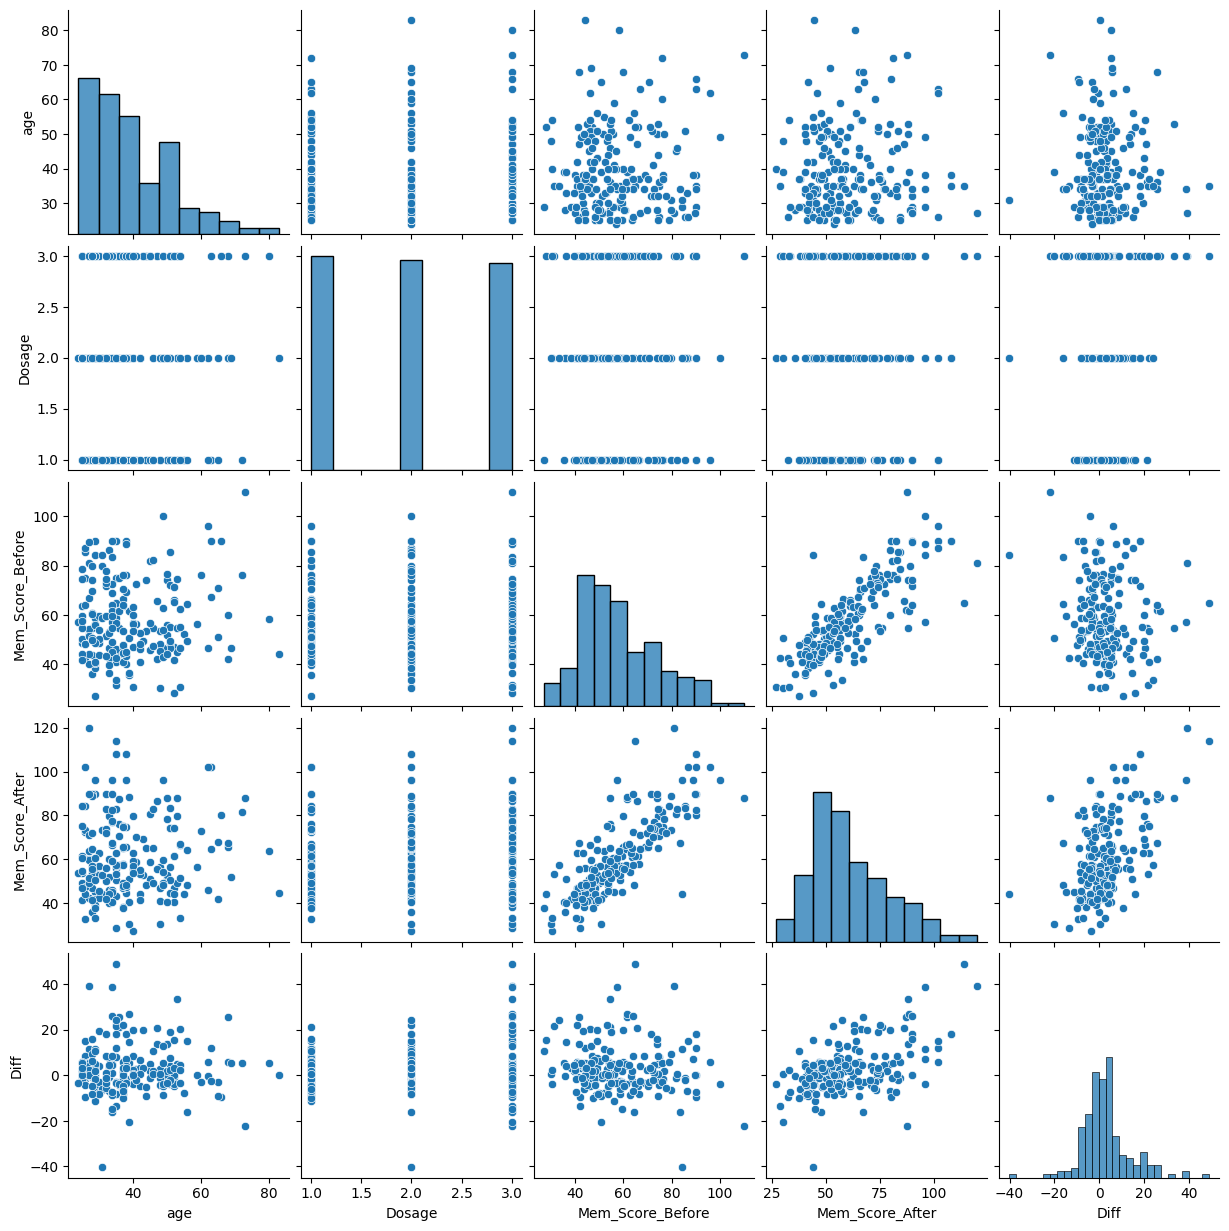

In [27]:
sns.pairplot(islander_data) # Matriz de gráficos de dispersión, donde en las diagonales tenemos histogramas. 

> Dado que el dosaje es cualitativo, hace un gráfico de barras. Lo que tiene sentido cruzar son las variables cuantitativas, porque ahí se muestra la dispersión de los datos. Esto va acompañando al coeficiente de corelación. El histograma es uno de los primeros gráficos para realizar en una variable cuantitativa.

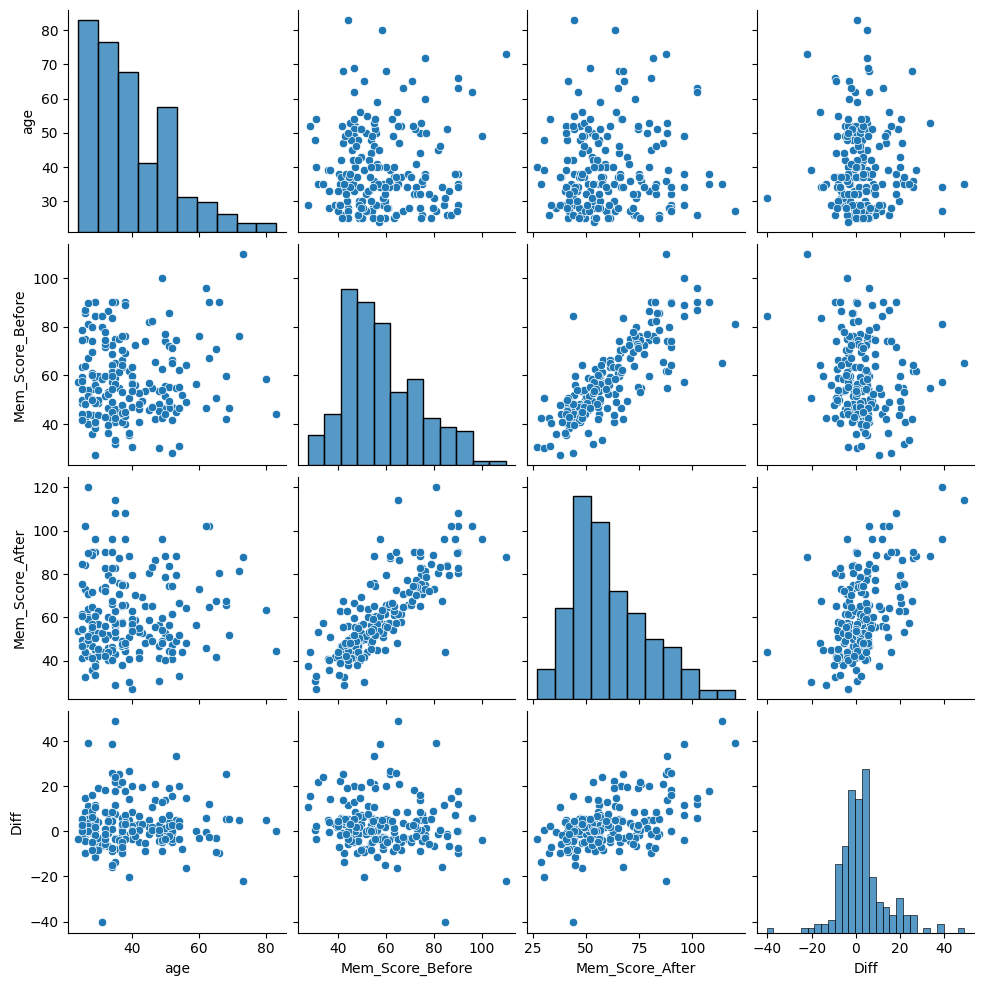

In [29]:
sns.pairplot(islander_data.select_dtypes(include='number'))

> En este gráfico podemos corrobrar la correlación. En la diagonal podemos corroborar la oblicuidad y curtosis de los datos. Ej: Podemos corroborar que Diff tiene una distribución con los valores bastante concentrados en la media.

> También podemos estratificar con respecto a alguna variable. Ej: Drug

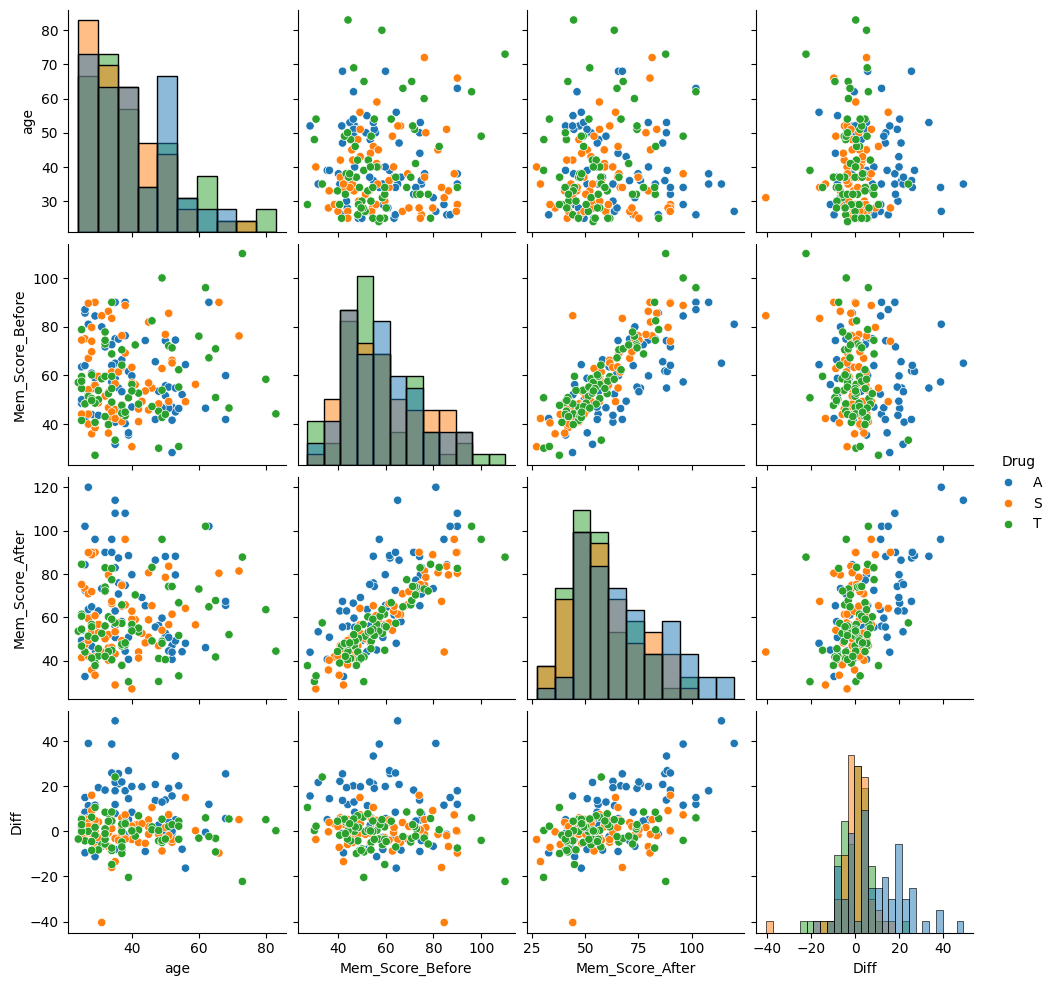

In [38]:
sns.pairplot(pd.concat([islander_data.select_dtypes(include='number'), islander_data['Drug']], axis=1), hue='Drug', diag_kind="hist")

> Por como están los datos podemos ver que el tratamiento con la dorga A se diferencia más que con el grupo placebo. En cambio, el tratamiento con la droga T se correlaciona bastante con el grupo placebo, dando a entender que no tuvo mucho efecto.

<Axes: ylabel='Diff'>

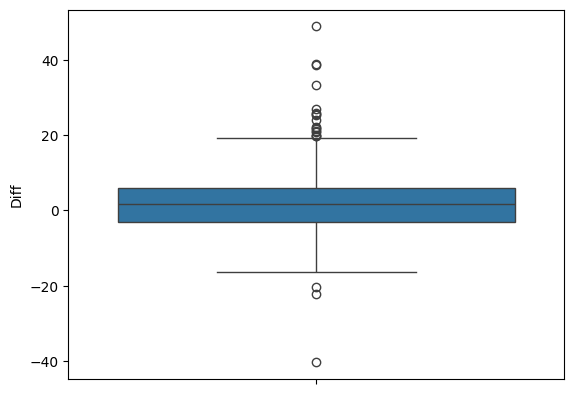

In [39]:
sns.boxplot(data = islander_data, y = 'Diff')

> Dado que la caja es bastante estrecha podemos ver que la distribución es leptocúritca (bastante concentrados los datos en la media). También podemos ver algunos valores atípicos.

> Cinco cosas importantes para los gráficos (que puedan responder):  
> - Que (que se está midiendo - caracterizando -)  
> - Como (tiene que ver con la unidad de medida)  
> - Cuando (si hay un período de tiempo en ese estudio)  
> - Donde  
> - Fuente (fuente: ej: datos de elaboración propias)  

<Axes: ylabel='Mem_Score_Before'>

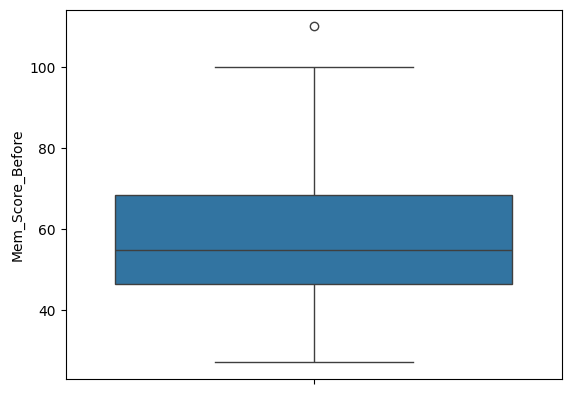

In [40]:
sns.boxplot(islander_data['Mem_Score_Before'])

<AxesSubplot:>

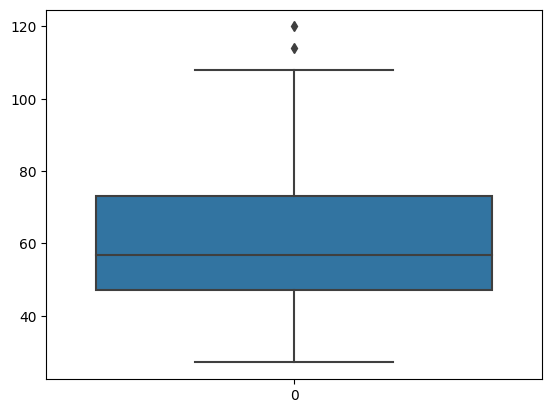

In [16]:
sns.boxplot(islander_data.Mem_Score_After)

<AxesSubplot:xlabel='Drug', ylabel='Diff'>

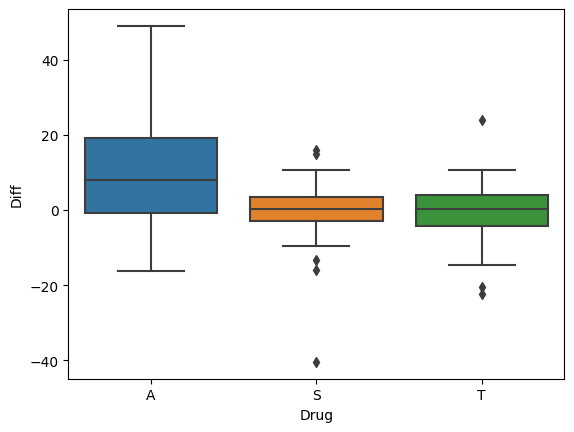

In [36]:
sns.boxplot(x=islander_data['Drug'], y=islander_data['Diff'])

> Muestra las diferencias entre grupos de tratamientos respecto a alguna variable.

> En el grupo A, hay una cola pesada a la derecha, no es muy simétrica. Hay dos tratamientos que son más parecidos entre sí (S y T). El tratamiento S los datos son más homogeneos (la caja es más chica), bastante leptocúrtica. En el tratamiento A hubo múcho más variabilidad de los datos. Después hay que completar con un test de hipotesis. Esto que veo a ojo es significativo o no (nivel de significacion).

> Se puede pensar como dos objetivos:
> 1 - Probar si el tratamiento A produjo un efecto. Es decir, si el mu es distinto de 0 (test bilateral).
> 2 - Comprar entre tratamientos y hacer una Nova (sino quiero hacerlo comparo entre tratamientos el mu_A, mu_S, mu_T) o como no hay normalidad puedo hacer un test no paramétrico y comprar las medianas.

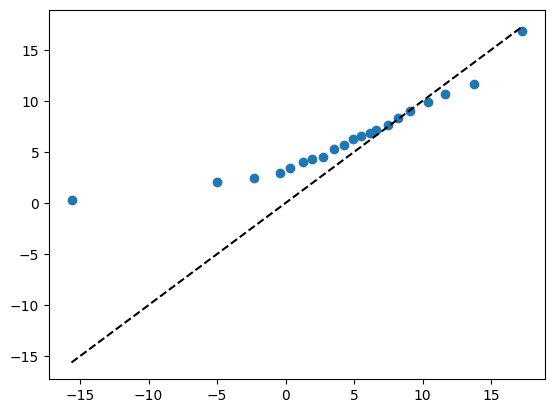

In [38]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.normal(5,5,250) # En el eje x ponemos los percentiles de la distribución normal.
Y = np.random.rayleigh(5,250) # En el eje y ponemos los percentiles de la distribución de rayleigh (chi2 es la generalización)

percs = np.linspace(0,100,21)
qn_a = np.percentile(X, percs)
qn_b = np.percentile(Y, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

> Tiene una cola liviana a la izquierda. La chi2 no toma valores negativos, toma solo valores positivos. Entonces, dado que la normal sí toma valores negativos. Es leptocúrtica con respecto a la normal al principio. Comparado con la normal, va a crecer de golpe y después va a bajar.

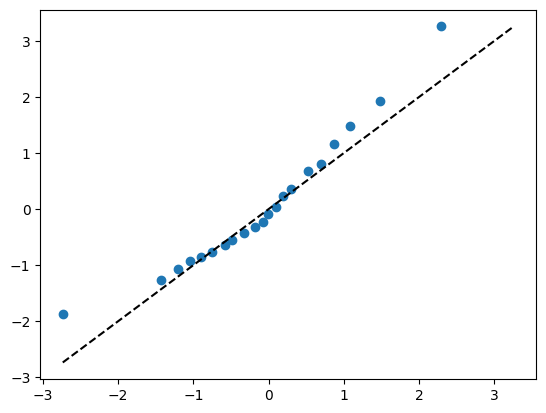

In [39]:

X = np.random.normal(0,1,len(islander_data))
Y = (islander_data.Mem_Score_After - islander_data.Mem_Score_After.mean()) / islander_data.Mem_Score_After.std()

percs = np.linspace(0,100,21)
qn_a = np.percentile(X, percs)
qn_b = np.percentile(Y, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

> La variable para hacer la comparación primero se estandaríza (para comparar con la normal - estándar contra estándar -). La primer cola es liviana y la última es pesada. Hay poquitos datos que se alejan de la normalidad, pero el común está bastante cercano a la normal.